In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as animation
import SIR

In [27]:
import SIR
import animate_plot as ap

## Functions

In [28]:
def plot_state(
    x: np.ndarray, y: np.ndarray, sol: np.ndarray, t, i_t: int, save: bool = False
) -> None:
    titles = ["Susceptible", "Infected", "Recovered"]
    cmaps = ["Blues", "Reds", "YlGn"]

    plt.rcParams["font.size"] = 12
    fig, axs = plt.subplots(
        1,
        3,
        subplot_kw={"projection": "3d", "xlabel": "x", "ylabel": "y"},
        figsize=(26, 10),
    )
    for ax in axs:
        ax.set_zlim(0, np.max(sol[i_t]) * 1.02)
    for i in range(len(axs)):
        axs[i].plot_surface(
            x,
            y,
            sol[i_t, i, :, :],
            cmap=cmaps[i],
            vmin=np.max(np.min(sol[i_t, i] - 10), 0),
        )
        axs[i].set_title(titles[i])
        axs[i].set_zlabel(titles[i])
    fig.suptitle(f"Plot of the SIR-model at time {t[i_t]:.3f}", fontsize=16)
    fig.tight_layout()
    if save:
        plt.savefig(f"./Images/plot-i_t={i_t}.pdf")
    else:
        plt.show()

In [78]:
def plot_state_2(
    x: np.ndarray, y: np.ndarray, sol: np.ndarray, t, i_t: int, save: bool = False
) -> None:
    titles = ["Susceptible", "Infected", "Recovered"]
    cmaps = ["Blues", "Reds", "YlGn"]

    for i in range(len(titles)):
        fig, ax = plt.subplots(
            1, 1, subplot_kw={"projection": "3d", "xlabel": "x", "ylabel": "y"}
        )
        ax.plot_surface(
            x,
            y,
            sol[i_t, i, :, :],
            cmap=cmaps[i],
            vmin=np.max(np.min(sol[i_t, i] - 10), 0),
        )
        ax.set_zlabel(titles[i])
        fig.suptitle(rf"{titles[i]} at time {t[i_t]:.3f}")
        fig.tight_layout()
        fig.savefig(f"./Images/plot-i_t={i_t}-{i}.pdf")
        fig.clear()
    return None

In [105]:
def plot_state_3(
    x: np.ndarray, y: np.ndarray, sol: np.ndarray, t, i_t: int, save: bool = False
) -> None:
    titles = ["Susceptible", "Infected", "Recovered"]
    cmaps = ["Blues", "Reds", "YlGn"]

    for i in range(len(titles)):
        fig, ax = plt.subplots(
            subplot_kw={"xlabel": "x", "ylabel": "y"}
        )
        im = ax.imshow(
            sol[i_t, i, :, :],
            # cmap=cmaps[i],
            # vmin=np.max(np.min(sol[i_t, i] - 10), 0),
            extent=[0, 1, 0, 1],
            origin="lower",
        )
        fig.suptitle(rf"{titles[i]} at time {t[i_t]:.3f}")
        fig.colorbar(im)
        fig.tight_layout()
        fig.savefig(f"./Images/plot-i_t={i_t}-{i}.pdf")
        plt.close()
    return None

In [132]:
def plot_state_grid(sol: np.ndarray, t) -> None:
    titles = ["Susceptible", "Infected", "Recovered"]
    i_t = [i * 1000 for i in range(11)]
    i_t_titles = [round(float(t[i]), 3) for i in i_t]
    for i in range(len(titles)):
        fig, axs = plt.subplots(2, 4, subplot_kw={"xlabel": "x", "ylabel": "y"})
        for j in range(2):
            for k in range(3):
                im = axs[j, k].imshow(
                    sol[i_t[2*(j + k)], i, :, :],
                    extent=[0, 1, 0, 1],
                    origin="lower",
                )
        fig.suptitle(rf"{titles[i]}\n at $t \in {i_t_titles}$")
        fig.colorbar(axs, axs[:, 3])
        fig.tight_layout()
        fig.savefig(f"./Images/plot-grid-{i}.pdf")
        plt.close()

## Test problem

In [47]:
N = 100
M = 10_000
a = 10

x_grid, y_grid = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))

S_0 = np.exp(-a / 2 * ((x_grid - 0.5)**2 / a + (y_grid - 0.25) ** 2))
I_0 = np.exp(-a / 2 * ((x_grid - 0.75) ** 2 + (y_grid - 0.75) ** 2))
R_0 = np.zeros((N, N))


total_num_people = np.sum(S_0 + I_0 + R_0)

S_0 /= total_num_people
I_0 /= total_num_people
R_0 /= total_num_people

x_grid, y_grid = np.meshgrid(np.linspace(0, 1, N+2), np.linspace(0, 1, N+2))
beta = 100_000*np.exp(-a / 2 * ((x_grid - 0.25) ** 2 + (y_grid - 0.5)**2 / a))
gamma = 1
mu_I = 1e-1
mu_S = 1e-1

In [48]:
u, t = SIR.solve(1, 1, N, M, S_0, I_0, R_0, beta, gamma, mu_I, mu_S)

In [107]:
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, N + 4), np.linspace(0, 1, N + 4))
plot_state_3(x_grid, y_grid, u, t, 500)

In [122]:
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, N + 4), np.linspace(0, 1, N + 4))
plot_state_3(x_grid, y_grid, u, t, 0, save=True)
plot_state_3(x_grid, y_grid, u, t, 100, save=True)
plot_state_3(x_grid, y_grid, u, t, 500, save=True)
plot_state_3(x_grid, y_grid, u, t, 1000, save=True)
plot_state_3(x_grid, y_grid, u, t, 2000, save=True)
plot_state_3(x_grid, y_grid, u, t, 3000, save=True)
plot_state_3(x_grid, y_grid, u, t, 4000, save=True)
plot_state_3(x_grid, y_grid, u, t, 5000, save=True)
plot_state_3(x_grid, y_grid, u, t, 6000, save=True)
plot_state_3(x_grid, y_grid, u, t, 7000, save=True)
plot_state_3(x_grid, y_grid, u, t, 8000, save=True)
plot_state_3(x_grid, y_grid, u, t, 9000, save=True)
plot_state_3(x_grid, y_grid, u, t, 10_000, save=True)

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

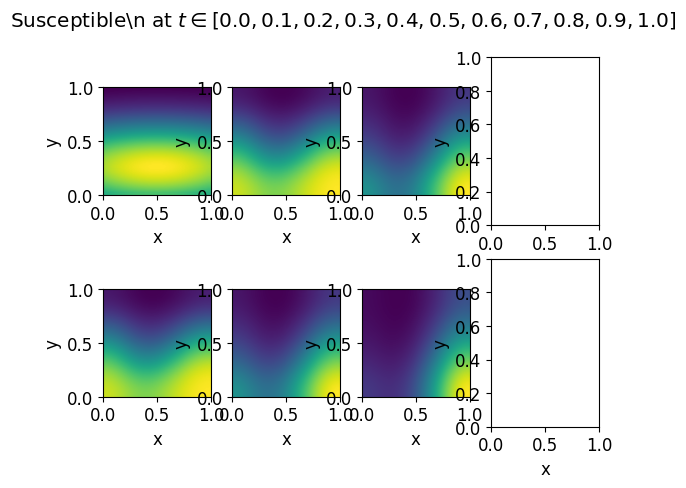

In [133]:
plot_state_grid(u, t)

## Population Deviation

In [120]:
def population_deviation(u, t) -> None:
    initial = np.sum(u[0], axis=(0, 1, 2))
    people = np.sum(u, axis=(1, 2, 3))

    plt.plot(t, (people - initial) / initial * 100)
    plt.xlabel("Time")
    plt.ylabel("Population deviation (%)")
    plt.grid()
    plt.title("Total population deviation")
    plt.savefig("Images/pop_deviation.pdf")
    plt.show()

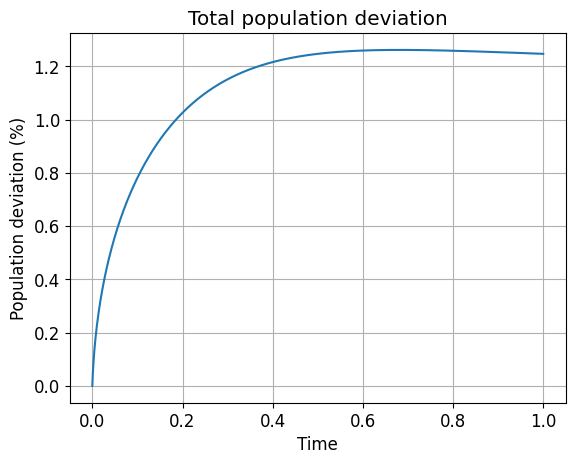

In [121]:
population_deviation(u, t)